In [1]:
import pandas as pd
df= pd.read_csv("mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [2]:
df['injury_na'] = df['subject_injury'].isna() # Create a missing value dummy
df['injury_na'].value_counts() # How many missings?

injury_na
True     9848
False    3077
Name: count, dtype: int64

In [20]:
import pandas as pd
import numpy as np
import requests
import json
import os
import dotenv

In [9]:
url = "https://www.clinicaltrials.gov/api/v2/stats/field/values?fields=PrimaryOutcomeMeasure"


In [15]:
df = pd.read_csv(url)

print(df.head())
df.transpose().head(20)

Empty DataFrame
Columns: [[{"type":"STRING", piece:"PrimaryOutcomeMeasure", field:"protocolSection.outcomesModule.primaryOutcomes.measure", missingStudiesCount:17576, longest:{"value":"Percent Change From Baseline in Chemistry Parameters in Combination Treatment Period:ALT,  Albumin,  ALP,  AST,  Calcium,  CO2,  Chloride,  Creatinine,  Direct Bilirubin,  Glucose,  Lactate Dehydrogenase,  Magnesium,  Potassium,  Sodium,  Total Bilirubin,  Total Protein", length:255, nctId:"NCT02215096"}, uniqueValuesCount:816041, topValues:[{"value":"Overall survival", studiesCount:1244}, {"value":"Mortality", studiesCount:946}, {"value":"Overall Survival", studiesCount:838}, {"value":"Cmax", studiesCount:834}, {"value":"Objective Response Rate (ORR)", studiesCount:762}, {"value":"Overall Survival (OS)", studiesCount:689}, {"value":"Adverse events", studiesCount:672}, {"value":"Progression-free survival", studiesCount:662}, {"value":"Adverse Events", studiesCount:611}, {"value":"Safety", studiesCount:60

""
"[{""type"":""STRING"""
"piece:""PrimaryOutcomeMeasure"""
"field:""protocolSection.outcomesModule.primaryOutcomes.measure"""
missingStudiesCount:17576
"longest:{""value"":""Percent Change From Baseline in Chemistry Parameters in Combination Treatment Period:ALT"
Albumin
ALP
AST
Calcium
CO2


In [11]:
import requests
import pandas as pd

url = "https://www.clinicaltrials.gov/api/v2/stats/field/values?fields=PrimaryOutcomeMeasure"
resp = requests.get(url)
resp.raise_for_status()  # will error if bad status

data = resp.json()  # if the API outputs JSON
# Or if CSV: data = resp.text and use pd.read_csv on StringIO

# Convert to DataFrame (if JSON is a list of dicts)
df = pd.json_normalize(data)
df.to_csv("primary_outcome.csv", index=False)
df


,type,piece,field,missingStudiesCount,uniqueValuesCount,topValues,longest.value,longest.length,longest.nctId
0,STRING,PrimaryOutcomeMeasure,protocolSection.outcomesModule.primaryOutcomes...,17576,816041,"[{'value': 'Overall survival', 'studiesCount':...",Percent Change From Baseline in Chemistry Para...,255,NCT02215096


In [16]:
import pandas as pd

url = "https://clinicaltrials.gov/api/v2/studies/NCT01985360"
df = pd.read_json(url)

print(df.head())


                                                              protocolSection  \
identificationModule        {'nctId': 'NCT01985360', 'orgStudyIdInfo': {'i...   
statusModule                {'statusVerifiedDate': '2021-09', 'overallStat...   
sponsorCollaboratorsModule  {'responsibleParty': {'type': 'SPONSOR'}, 'lea...   
oversightModule             {'oversightHasDmc': True, 'isFdaRegulatedDrug'...   
descriptionModule           {'briefSummary': 'The purpose of the ISCHEMIA-...   

                           resultsSection documentSection derivedSection  \
identificationModule                  NaN             NaN            NaN   
statusModule                          NaN             NaN            NaN   
sponsorCollaboratorsModule            NaN             NaN            NaN   
oversightModule                       NaN             NaN            NaN   
descriptionModule                     NaN             NaN            NaN   

                            hasResults  
identificationM

In [24]:
import requests
import pandas as pd

url = "https://clinicaltrials.gov/api/v2/studies/NCT01985360/results"
r = requests.get(url)
r



<Response [404]>

In [26]:
primary = pd.read_csv("primary_outcome.csv")
primary.head()

,type,piece,field,missingStudiesCount,uniqueValuesCount,topValues,longest.value,longest.length,longest.nctId
0,STRING,PrimaryOutcomeMeasure,protocolSection.outcomesModule.primaryOutcomes...,17576,816041,"[{'value': 'Overall survival', 'studiesCount':...",Percent Change From Baseline in Chemistry Para...,255,NCT02215096


In [51]:
study_vals= primary["topValues"].values
study_vals

array(["[{'value': 'Overall survival', 'studiesCount': 1244}, {'value': 'Mortality', 'studiesCount': 946}, {'value': 'Overall Survival', 'studiesCount': 838}, {'value': 'Cmax', 'studiesCount': 834}, {'value': 'Objective Response Rate (ORR)', 'studiesCount': 762}, {'value': 'Overall Survival (OS)', 'studiesCount': 689}, {'value': 'Adverse events', 'studiesCount': 672}, {'value': 'Progression-free survival', 'studiesCount': 662}, {'value': 'Adverse Events', 'studiesCount': 611}, {'value': 'Safety', 'studiesCount': 605}, {'value': 'Incidence of adverse events', 'studiesCount': 574}, {'value': 'Objective response rate (ORR)', 'studiesCount': 548}, {'value': 'Progression Free Survival (PFS)', 'studiesCount': 523}, {'value': 'PFS', 'studiesCount': 509}, {'value': 'Progression-free survival (PFS)', 'studiesCount': 497}, {'value': 'ORR', 'studiesCount': 477}, {'value': 'Overall survival (OS)', 'studiesCount': 445}, {'value': 'Survival', 'studiesCount': 441}, {'value': 'Progression Free Surviva

In [52]:
import ast
arr = primary["topValues"].values

In [56]:
df = pd.DataFrame(arr)

df

,0
0,"[{'value': 'Overall survival', 'studiesCount':..."


[{'value': 'Overall survival', 'studiesCount': 1244}, {'value': 'Mortality', 'studiesCount': 946}, {'value': 'Overall Survival', 'studiesCount': 838}, {'value': 'Cmax', 'studiesCount': 834}, {'value': 'Objective Response Rate (ORR)', 'studiesCount': 762}, {'value': 'Overall Survival (OS)', 'studiesCount': 689}, {'value': 'Adverse events', 'studiesCount': 672}, {'value': 'Progression-free survival', 'studiesCount': 662}, {'value': 'Adverse Events', 'studiesCount': 611}, {'value': 'Safety', 'studiesCount': 605}, {'value': 'Incidence of adverse events', 'studiesCount': 574}, {'value': 'Objective response rate (ORR)', 'studiesCount': 548}, {'value': 'Progression Free Survival (PFS)', 'studiesCount': 523}, {'value': 'PFS', 'studiesCount': 509}, {'value': 'Progression-free survival (PFS)', 'studiesCount': 497}, {'value': 'ORR', 'studiesCount': 477}, {'value': 'Overall survival (OS)', 'studiesCount': 445}, {'value': 'Survival', 'studiesCount': 441}, {'value': 'Progression Free Survival', 'studiesCount': 440}, {'value': 'Blood pressure', 'studiesCount': 434}, {'value': 'Progression free survival', 'studiesCount': 426}, {'value': 'Pain intensity', 'studiesCount': 425}, {'value': 'HbA1c', 'studiesCount': 422}, {'value': 'Maximum Tolerated Dose (MTD)', 'studiesCount': 417}, {'value': 'Overall Response Rate (ORR)', 'studiesCount': 411}, {'value': 'Objective Response Rate', 'studiesCount': 409}, {'value': 'Objective response rate', 'studiesCount': 391}, {'value': 'overall survival', 'studiesCount': 387}, {'value': 'Response rate', 'studiesCount': 370}, {'value': 'Acceptability', 'studiesCount': 362}, {'value': 'Maximum tolerated dose (MTD)', 'studiesCount': 352}, {'value': 'Progression-Free Survival (PFS)', 'studiesCount': 349}, {'value': 'Weight', 'studiesCount': 347}, {'value': 'Number of Participants With Adverse Events', 'studiesCount': 337}, {'value': 'Anxiety', 'studiesCount': 336}, {'value': 'Heart rate', 'studiesCount': 335}, {'value': 'Overall Response Rate', 'studiesCount': 331}, {'value': 'Pain', 'studiesCount': 324}, {'value': 'Depression', 'studiesCount': 308}, {'value': 'All-cause mortality', 'studiesCount': 297}, {'value': 'Progression-free Survival (PFS)', 'studiesCount': 295}, {'value': 'Quality of life', 'studiesCount': 295}, {'value': 'Overall response rate', 'studiesCount': 292}, {'value': 'Recruitment rate', 'studiesCount': 292}, {'value': 'Visual Analog Scale', 'studiesCount': 291}, {'value': 'Retention', 'studiesCount': 288}, {'value': 'Death', 'studiesCount': 287}, {'value': 'Progression free survival (PFS)', 'studiesCount': 269}, {'value': 'Overall response rate (ORR)', 'studiesCount': 261}, {'value': 'Visual Analogue Scale', 'studiesCount': 254}, {'value': 'Blood Pressure', 'studiesCount': 252}, {'value': 'Adherence', 'studiesCount': 249}, {'value': 'Bioequivalence', 'studiesCount': 246}, {'value': 'Visual Analog Scale (VAS)', 'studiesCount': 244}, {'value': 'Number of participants with adverse events', 'studiesCount': 241}, {'value': 'Body weight', 'studiesCount': 240}, {'value': 'Progression-free Survival', 'studiesCount': 239}, {'value': 'Incidence of Treatment-Emergent Adverse Events', 'studiesCount': 236}, {'value': 'Disease-free survival', 'studiesCount': 232}, {'value': 'Feasibility', 'studiesCount': 232}, {'value': 'Maximum tolerated dose', 'studiesCount': 228}, {'value': 'Maximum Observed Plasma Concentration (Cmax)', 'studiesCount': 226}, {'value': 'Safety and tolerability', 'studiesCount': 226}, {'value': 'Tmax', 'studiesCount': 224}, {'value': 'Response Rate', 'studiesCount': 221}, {'value': 'AUC', 'studiesCount': 217}, {'value': 'Efficacy', 'studiesCount': 216}, {'value': 'Balance', 'studiesCount': 213}, {'value': 'Pain Intensity', 'studiesCount': 210}, {'value': 'mortality', 'studiesCount': 210}, {'value': 'Berg Balance Scale', 'studiesCount': 196}, {'value': 'Heart Rate', 'studiesCount': 194}, {'value': 'Sensitivity', 'studiesCount': 194}, {'value': 'Dose-limiting toxicity (DLT)', 'studiesCount': 193}, {'value': 'Maximum Tolerated Dose', 'studiesCount': 192}, {'value': 'Safety and Tolerability', 'studiesCount': 192}, {'value': 'BMI', 'studiesCount': 187}, {'value': 'Visual Analogue Scale (VAS)', 'studiesCount': 186}, {'value': 'Change in HbA1c', 'studiesCount': 185}, {'value': 'AUC0-t', 'studiesCount': 180}, {'value': 'Toxicity', 'studiesCount': 179}, {'value': 'Disease free survival', 'studiesCount': 178}, {'value': 'Fatigue', 'studiesCount': 178}, {'value': 'Incidence of Treatment-Emergent Adverse Events [Safety and Tolerability]', 'studiesCount': 177}, {'value': 'Postoperative pain', 'studiesCount': 177}, {'value': 'Weight loss', 'studiesCount': 177}, {'value': 'Length of hospital stay', 'studiesCount': 175}, {'value': 'Physical activity', 'studiesCount': 175}, {'value': 'Pain score', 'studiesCount': 173}, {'value': 'Quality of Life', 'studiesCount': 171}, {'value': 'progression-free survival', 'studiesCount': 171}, {'value': 'Body Mass Index', 'studiesCount': 170}, {'value': 'Number of Participants With Adverse Events (AEs)', 'studiesCount': 169}, {'value': 'Patient satisfaction', 'studiesCount': 166}, {'value': 'OS', 'studiesCount': 163}, {'value': 'Number of patients with adverse events', 'studiesCount': 162}, {'value': 'Recruitment', 'studiesCount': 160}, {'value': 'All cause mortality', 'studiesCount': 157}, {'value': 'Number of Adverse Events', 'studiesCount': 156}, {'value': 'Incidence of Adverse Events', 'studiesCount': 155}, {'value': 'Body composition', 'studiesCount': 153}, {'value': 'Incidence of adverse events (AEs)', 'studiesCount': 153}, {'value': 'Visual acuity', 'studiesCount': 153}, {'value': 'Complications', 'studiesCount': 152}, {'value': 'Muscle strength', 'studiesCount': 151}, {'value': 'MTD', 'studiesCount': 150}, {'value': 'Number of participants with treatment-related adverse events as assessed by CTCAE v4.0', 'studiesCount': 149}, {'value': 'Retention rate', 'studiesCount': 147}, {'value': 'Height', 'studiesCount': 146}, {'value': 'Event-free survival', 'studiesCount': 144}, {'value': 'progression free survival', 'studiesCount': 144}, {'value': 'Range of motion', 'studiesCount': 141}, {'value': 'Heart rate variability', 'studiesCount': 140}, {'value': 'Pittsburgh Sleep Quality Index', 'studiesCount': 139}, {'value': 'Clinical pregnancy rate', 'studiesCount': 138}, {'value': 'Numeric Pain Rating Scale', 'studiesCount': 138}, {'value': 'DLT', 'studiesCount': 137}, {'value': 'Insulin sensitivity', 'studiesCount': 136}, {'value': 'Peak Plasma Concentration (Cmax)', 'studiesCount': 135}, {'value': 'Specificity', 'studiesCount': 135}, {'value': 'Maximum observed plasma concentration (Cmax)', 'studiesCount': 134}, {'value': 'Number of adverse events', 'studiesCount': 132}, {'value': 'Patient Satisfaction', 'studiesCount': 132}, {'value': 'Body mass index', 'studiesCount': 131}, {'value': 'Visual Acuity', 'studiesCount': 130}, {'value': 'Disability', 'studiesCount': 129}, {'value': 'Recruitment Rate', 'studiesCount': 129}, {'value': 'Number of Participants with Adverse Events (AEs)', 'studiesCount': 127}, {'value': 'Body Mass Index (BMI)', 'studiesCount': 125}, {'value': 'Progression-Free Survival', 'studiesCount': 125}, {'value': 'Sleep quality', 'studiesCount': 124}, {'value': 'Cognitive function', 'studiesCount': 122}, {'value': 'Postoperative complications', 'studiesCount': 122}, {'value': 'Dose limiting toxicity (DLT)', 'studiesCount': 121}, {'value': 'Neck Disability Index', 'studiesCount': 120}, {'value': 'VAS', 'studiesCount': 120}, {'value': 'Maximum Plasma Concentration (Cmax)', 'studiesCount': 119}, {'value': 'Physical Activity', 'studiesCount': 118}, {'value': 'Mortality rate', 'studiesCount': 117}, {'value': 'Adverse Events (AEs)', 'studiesCount': 116}, {'value': 'Pittsburgh Sleep Quality Index (PSQI)', 'studiesCount': 116}, {'value': 'Range of Motion', 'studiesCount': 116}, {'value': 'Waist circumference', 'studiesCount': 116}, {'value': 'Number of participants with adverse events (AEs)', 'studiesCount': 115}, {'value': 'Systolic blood pressure', 'studiesCount': 114}, {'value': 'Perceived Stress Scale', 'studiesCount': 113}, {'value': 'Body Weight', 'studiesCount': 112}, {'value': 'response rate', 'studiesCount': 112}, {'value': 'Change in body weight', 'studiesCount': 111}, {'value': 'Pharmacokinetics', 'studiesCount': 111}, {'value': 'Recommended Phase 2 Dose (RP2D)', 'studiesCount': 111}, {'value': 'Depressive symptoms', 'studiesCount': 110}, {'value': 'Number of Participants with Adverse Events', 'studiesCount': 110}, {'value': 'Numeric Pain Rating Scale (NPRS)', 'studiesCount': 110}, {'value': 'AUC0-∞', 'studiesCount': 109}, {'value': 'Adverse events (AEs)', 'studiesCount': 109}, {'value': 'Number of Participants with Adverse Events as a Measure of Safety and Tolerability', 'studiesCount': 109}, {'value': 'Oswestry Disability Index', 'studiesCount': 109}, {'value': 'blood pressure', 'studiesCount': 109}, {'value': 'Systolic Blood Pressure', 'studiesCount': 108}, {'value': 'Accuracy', 'studiesCount': 107}, {'value': 'Diagnostic accuracy', 'studiesCount': 107}, {'value': 'Dose Limiting Toxicity (DLT)', 'studiesCount': 107}, {'value': 'Hemoglobin A1c', 'studiesCount': 107}, {'value': 'AUClast', 'studiesCount': 106}, {'value': 'Incidence of treatment-emergent adverse events (TEAEs)', 'studiesCount': 106}, {'value': 'Number of Participants With Adverse Events (AEs) and Serious Adverse Events (SAEs)', 'studiesCount': 106}, {'value': 'Sleep Quality', 'studiesCount': 106}, {'value': 'RP2D', 'studiesCount': 105}, {'value': 'Operative time', 'studiesCount': 104}, {'value': 'Opioid consumption', 'studiesCount': 102}, {'value': 'Vital signs', 'studiesCount': 101}, {'value': 'Compliance', 'studiesCount': 100}, {'value': 'Response', 'studiesCount': 100}, {'value': 'Time to progression', 'studiesCount': 100}, {'value': 'postoperative pain', 'studiesCount': 100}, {'value': 'Length of stay', 'studiesCount': 99}, {'value': 'Number of subjects with adverse events', 'studiesCount': 99}, {'value': 'Live birth rate', 'studiesCount': 98}, {'value': 'Number of Participants With Treatment-Emergent Adverse Events (TEAEs)', 'studiesCount': 97}, {'value': 'Oswestry Disability Index (ODI)', 'studiesCount': 97}, {'value': 'Recurrence', 'studiesCount': 97}, {'value': 'MACE', 'studiesCount': 96}, {'value': 'objective response rate', 'studiesCount': 96}, {'value': 'Maximum plasma concentration (Cmax)', 'studiesCount': 95}, {'value': 'Pain Score', 'studiesCount': 95}, {'value': 'Primary Safety Endpoint', 'studiesCount': 94}, {'value': 'Stress', 'studiesCount': 94}, {'value': 'Hemoglobin', 'studiesCount': 93}, {'value': 'Incidence of Adverse Events (AEs)', 'studiesCount': 93}, {'value': 'Incidence of treatment-emergent adverse events', 'studiesCount': 93}, {'value': 'overall response rate', 'studiesCount': 93}, {'value': 'Morbidity', 'studiesCount': 92}, {'value': 'pain intensity', 'studiesCount': 92}, {'value': 'Change in blood pressure', 'studiesCount': 91}, {'value': 'Disease-free survival (DFS)', 'studiesCount': 91}, {'value': 'In-hospital mortality', 'studiesCount': 91}, {'value': 'Muscle Strength', 'studiesCount': 91}, {'value': 'Visual analogue scale', 'studiesCount': 91}, {'value': 'Glucose', 'studiesCount': 90}, {'value': 'Health-related quality of life', 'studiesCount': 90}, {'value': 'Event-free survival (EFS)', 'studiesCount': 88}, {'value': 'Oxygen saturation', 'studiesCount': 88}, {'value': 'Pregnancy rate', 'studiesCount': 88}, {'value': 'Recurrence rate', 'studiesCount': 88}, {'value': 'Technical success', 'studiesCount': 88}, {'value': 'Weight Loss', 'studiesCount': 88}, {'value': 'Body Composition', 'studiesCount': 87}, {'value': 'Postoperative Pain', 'studiesCount': 87}, {'value': 'all cause mortality', 'studiesCount': 87}, {'value': 'death', 'studiesCount': 87}, {'value': 'weight loss', 'studiesCount': 87}, {'value': 'Serious Adverse Events', 'studiesCount': 86}, {'value': 'Age', 'studiesCount': 85}, {'value': 'Insomnia Severity Index (ISI)', 'studiesCount': 85}, {'value': 'Triglycerides', 'studiesCount': 84}, {'value': 'heart rate', 'studiesCount': 84}, {'value': 'Area under the plasma concentration versus time curve (AUC)', 'studiesCount': 83}, {'value': 'Blood loss', 'studiesCount': 83}, {'value': 'Bone mineral density', 'studiesCount': 83}, {'value': 'Dose-limiting toxicity', 'studiesCount': 83}, {'value': 'Heart Rate Variability', 'studiesCount': 83}, {'value': 'Hospital Anxiety and Depression Scale (HADS)', 'studiesCount': 83}, {'value': 'Incidence and severity of adverse events', 'studiesCount': 83}, {'value': 'adverse events', 'studiesCount': 83}, {'value': 'Grip strength', 'studiesCount': 82}, {'value': 'Pain level', 'studiesCount': 82}, {'value': 'pain', 'studiesCount': 81}, {'value': 'Change in Weight', 'studiesCount': 80}, {'value': 'Dose Limiting Toxicity', 'studiesCount': 80}, {'value': 'Retention Rate', 'studiesCount': 80}, {'value': 'Safety and adverse events (AEs)', 'studiesCount': 80}, {'value': 'AUC0-inf', 'studiesCount': 79}, {'value': 'Complete response rate', 'studiesCount': 79}, {'value': 'Disease Control Rate (DCR)', 'studiesCount': 79}, {'value': 'Insulin Sensitivity', 'studiesCount': 79}, {'value': 'Number of Participants With Treatment-emergent Adverse Events (TEAEs)', 'studiesCount': 79}, {'value': 'Patient Health Questionnaire-9 (PHQ-9)', 'studiesCount': 79}, {'value': 'clinical pregnancy rate', 'studiesCount': 79}, {'value': 'Effectiveness', 'studiesCount': 78}, {'value': 'Exercise capacity', 'studiesCount': 78}, {'value': 'Goniometer', 'studiesCount': 78}, {'value': 'Incidence of Adverse Events, Graded According to National Cancer Institute Common Terminology Criteria for Adverse Events (NCI CTCAE) Version (v) 5.0', 'studiesCount': 78}, {'value': 'Number of Participants With Dose Limiting Toxicities (DLTs)', 'studiesCount': 78}, {'value': 'Number of Participants With Serious Adverse Events (SAEs)', 'studiesCount': 78}, {'value': 'Respiratory rate', 'studiesCount': 78}, {'value': 'Survival rate', 'studiesCount': 78}, {'value': '28-day mortality', 'studiesCount': 77}, {'value': 'Functional capacity', 'studiesCount': 77}, {'value': 'Primary Outcome', 'studiesCount': 77}]

In [63]:
import numpy as np
import pandas as pd
import ast

# Your original NumPy array
arrr = primary["topValues"].values
arr = np.array(arrr)
arr


array(["[{'value': 'Overall survival', 'studiesCount': 1244}, {'value': 'Mortality', 'studiesCount': 946}, {'value': 'Overall Survival', 'studiesCount': 838}, {'value': 'Cmax', 'studiesCount': 834}, {'value': 'Objective Response Rate (ORR)', 'studiesCount': 762}, {'value': 'Overall Survival (OS)', 'studiesCount': 689}, {'value': 'Adverse events', 'studiesCount': 672}, {'value': 'Progression-free survival', 'studiesCount': 662}, {'value': 'Adverse Events', 'studiesCount': 611}, {'value': 'Safety', 'studiesCount': 605}, {'value': 'Incidence of adverse events', 'studiesCount': 574}, {'value': 'Objective response rate (ORR)', 'studiesCount': 548}, {'value': 'Progression Free Survival (PFS)', 'studiesCount': 523}, {'value': 'PFS', 'studiesCount': 509}, {'value': 'Progression-free survival (PFS)', 'studiesCount': 497}, {'value': 'ORR', 'studiesCount': 477}, {'value': 'Overall survival (OS)', 'studiesCount': 445}, {'value': 'Survival', 'studiesCount': 441}, {'value': 'Progression Free Surviva

In [64]:
import ast
import pandas as pd

# start with an empty list to collect everything
all_items = []

for cell in study_vals:
    # if it's a string, parse it into a Python list of dicts
    if isinstance(cell, str):
        parsed = ast.literal_eval(cell)
    else:
        parsed = cell  # already a list/dict
    
    # add each dict in the list to our collector
    all_items.extend(parsed)

# turn into a DataFrame
df_topvalues = pd.DataFrame(all_items)

print(df_topvalues.head())
print(df_topvalues.shape)   # check how many rows you got


                           value  studiesCount
0               Overall survival          1244
1                      Mortality           946
2               Overall Survival           838
3                           Cmax           834
4  Objective Response Rate (ORR)           762
(250, 2)


In [66]:
import ast
import pandas as pd

df_topvalues = pd.DataFrame(
    [d for cell in study_vals for d in (ast.literal_eval(cell) if isinstance(cell, str) else cell)]
)

print(df_topvalues)


                             value  studiesCount
0                 Overall survival          1244
1                        Mortality           946
2                 Overall Survival           838
3                             Cmax           834
4    Objective Response Rate (ORR)           762
..                             ...           ...
245               Respiratory rate            78
246                  Survival rate            78
247               28-day mortality            77
248            Functional capacity            77
249                Primary Outcome            77

[250 rows x 2 columns]


In [68]:
import pandas as pd

# Create the data as a dictionary
data = {
    "Strategy": ["Invasive", "Conservative"],
    "N_Patients": [388, 389],
    "Deaths": [27, 31],
    "Percent_Deaths": [7.0, 8.0]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)



# If you want to calculate survival instead of deaths
df["Percent_Survival"] = 100 - df["Percent_Deaths"]
print(df)


       Strategy  N_Patients  Deaths  Percent_Deaths  Percent_Survival
0      Invasive         388      27             7.0              93.0
1  Conservative         389      31             8.0              92.0


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example numbers (replace with the actual counts from ClinicalTrials.gov)
n_invasive, deaths_invasive = 388, 27
n_conservative, deaths_conservative = 389, 31

# Survival outcomes: 1 = survived, 0 = died
invasive_data = np.array([1] * (n_invasive - deaths_invasive) + [0] * deaths_invasive)
conservative_data = np.array([1] * (n_conservative - deaths_conservative) + [0] * deaths_conservative)

# Bootstrap resampling
n_boot = 10000
boot_invasive = np.random.choice(invasive_data, size=(n_boot, n_invasive), replace=True).mean(axis=1)
boot_conservative = np.random.choice(conservative_data, size=(n_boot, n_conservative), replace=True).mean(axis=1)

# Convert to percentages
boot_invasive *= 100
boot_conservative *= 100


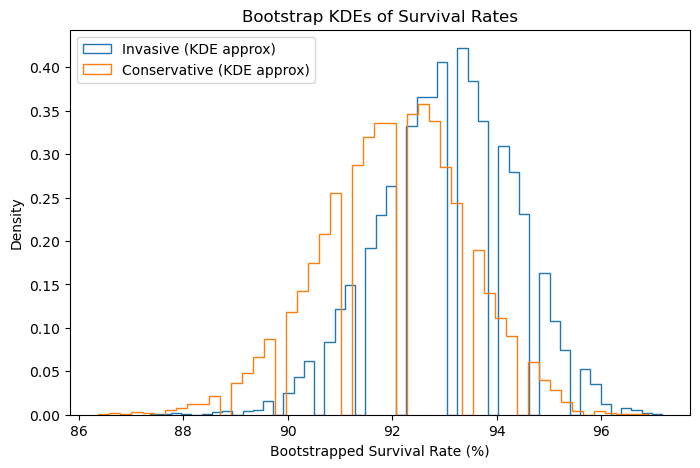

In [70]:
plt.figure(figsize=(8,5))
plt.hist(boot_invasive, bins=50, density=True, histtype="step", label="Invasive (KDE approx)")
plt.hist(boot_conservative, bins=50, density=True, histtype="step", label="Conservative (KDE approx)")
plt.xlabel("Bootstrapped Survival Rate (%)")
plt.ylabel("Density")
plt.title("Bootstrap KDEs of Survival Rates")
plt.legend()
plt.show()


In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Example counts (replace with actual trial numbers!)
n_invasive, deaths_invasive = 388, 27
n_conservative, deaths_conservative = 389, 31

# Create patient-level outcomes
invasive_data = np.array([1] * (n_invasive - deaths_invasive) + [0] * deaths_invasive)
conservative_data = np.array([1] * (n_conservative - deaths_conservative) + [0] * deaths_conservative)

# Bootstrap
n_boot = 10000
boot_invasive = np.random.choice(invasive_data, size=(n_boot, n_invasive), replace=True).mean(axis=1)
boot_conservative = np.random.choice(conservative_data, size=(n_boot, n_conservative), replace=True).mean(axis=1)

# Difference in survival rates
boot_diff = (boot_invasive - boot_conservative) * 100  # percentage difference


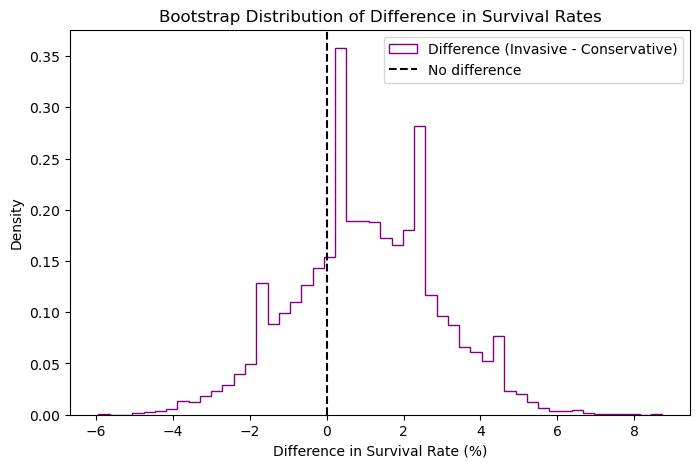

In [72]:
plt.figure(figsize=(8,5))
plt.hist(boot_diff, bins=50, density=True, histtype="step", color="purple", label="Difference (Invasive - Conservative)")
plt.axvline(0, color="black", linestyle="--", label="No difference")
plt.xlabel("Difference in Survival Rate (%)")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of Difference in Survival Rates")
plt.legend()
plt.show()
